<h1 align='center' style="color: blue;">MNIST - Image Processing and Identification
</h1>

Fashion MNIST dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. 

To load the dataset, installed `tensorflow V2`. 

In [1]:
!pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [5]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape


(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

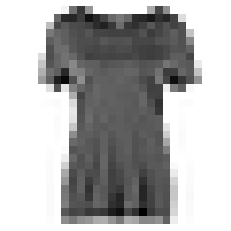

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

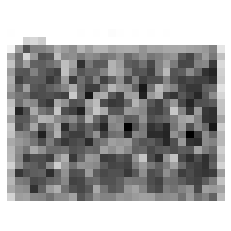

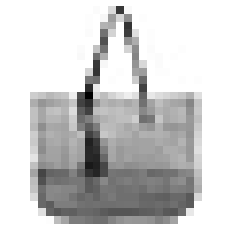

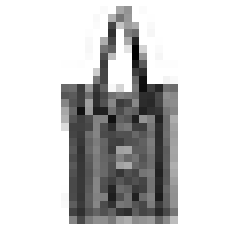

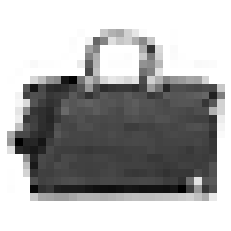

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
%matplotlib inline

for x in range(100):
    if y_train[x] == 8:        
        sample_image = X_train[x]
        plt.imshow(sample_image, cmap='binary')
        plt.axis('off')
        plt.show()
        time.sleep(5)

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [23]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Project Tasks:

<ul>
    <li><b>Task1:</b> Using the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Using different supervised learning models.</li>
        <li>Using different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, etc, for the model evaluation. </li>
        <li> Using the cross validation methods for hyperparameter selection.</li>
        <li> Specifying the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Using the best model to predict own fashion pieces.</li>
    <ul>
        <li>Taking a picture of five fashion pieces of own (pictures to be taken in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale images.</li>
        <li>Visualize all the images side by side</li>
        <li>Using the best model in Task 1 to predict the label of each of own images.</li>
        <li>To check how accurate is the final result</li>
    </ul>
</ul>

## SOLUTIONS

### Task1 : 
running various supervised models to train the train set and to evaluate the performance using the test set.

running basic python packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

In [36]:
y_train.shape

(60000,)

In [37]:
y_test.shape

(10000,)

In [3]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [4]:
X_train.shape

(60000, 784)

### MODEL_1 : Multiple regression 

In [10]:
#MULTIPLE REGRESSION MODEL : ALGORITHM 

# Step 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  #import functions/line can be written at the beginning

# Step 2
model = LinearRegression()

# step 3
#X_train, X_test, y_train and y_test are defined already in the above steps.

# Step 4
model.fit(X_train, y_train)

# Step 5
y_test_hat = model.predict(X_test) #this is called 'out sample data' 

# model.predict(X_train)           #this is called 'in sample data'

plotting y_test against y_test_hat to check the performance of the model

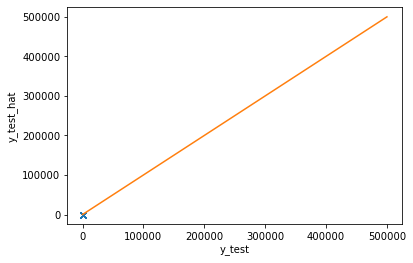

In [11]:
line_x = np.linspace(0, 500000, 500000)
line_y = line_x
plt.plot(y_test,y_test_hat, linestyle = 'None', marker='x')
plt.plot(line_x,line_y)
plt.xlabel("y_test")
plt.ylabel("y_test_hat");

using the below 3 levels of errors in the prediction model to check the performance of the model.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_test_hat)
MSE = mean_squared_error(y_test,y_test_hat)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 1.0221657385028429
MSE = 1.968429714245785
RMSE = 1.4030073821066604


using score( ) function to find the  𝑅2  value for both train and test data

In [13]:
# R2 for train set
model.score(X_train, y_train)

0.7728312037046021

In [14]:
# R2 for test set
model.score(X_test, y_test)

0.7614024588792988

results of multiple regression model :
MAE = 1.0221657385028429, 
MSE = 1.968429714245785, 
RMSE = 1.4030073821066604

R2 for train set : 0.7728312037046021 (77.283%), 
R2 for test set  : 0.7614024588792988 (76.140%)

#### Expalantion:

----------------------------------- END of MODEL_1 ------------------------------------------------------

### MODEL_2 : Logistic regression 

In [14]:
#LOGISTIC REGRESSION MODEL : ALGORITHM 

# Step 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 2
model = LogisticRegression(max_iter=1000000)

# Step 3
#X_train, X_test, y_train and y_test are defined already in the above steps.


# Step 4
model.fit(X_train, y_train)

# Step 5
y_test_hat = model.predict(X_test)

/Users/ammu/Desktop/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


checking the accuracy of logistic model:

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_hat, normalize = True) * 100 

83.78999999999999

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print()
print()
print(classification_report(y_test,y_test_hat))

Confusion Matrix
[[816   5  14  52   9   4  87   1  12   0]
 [  3 954   6  28   3   0   3   1   2   0]
 [ 23   5 732  13 139   0  77   0  11   0]
 [ 24  21  18 857  34   1  35   1   6   3]
 [  0   0 111  43 775   0  61   0  10   0]
 [  1   1   0   0   1 915   1  43  14  24]
 [148   6 132  50 116   0 521   0  26   1]
 [  0   0   0   0   0  33   0 937   2  28]
 [  5   6   7  13   3   8  16   8 931   3]
 [  0   0   0   1   0  14   1  43   0 941]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.96      0.95      0.95      1000
           2       0.72      0.73      0.72      1000
           3       0.81      0.86      0.83      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.52      0.58      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.93      0.92      1000
           

#### Expalantion:

----------------------------------- END of MODEL_2 ------------------------------------------------------

## MODEL_3 

### MODEL_3.1 : Decision tree 

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
#print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print()
print()
print(classification_report(y_test,y_test_hat))

Out-of-sample Accuracy:  75.57000000000001


              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1000
           1       0.95      0.92      0.93      1000
           2       0.64      0.55      0.59      1000
           3       0.75      0.80      0.78      1000
           4       0.53      0.65      0.58      1000
           5       0.92      0.84      0.87      1000
           6       0.51      0.41      0.45      1000
           7       0.81      0.90      0.85      1000
           8       0.88      0.80      0.84      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



#### Expalantion:

Running Decision tree with selecting hyopermeters (using StratifiedKFold)

### MODEL_3.2 : Decision tree with StratifiedKFold 

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,StratifiedKFold


model = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

bestModel = grid.best_estimator_
y_train_hat  = bestModel.predict(X_train)
y_test_hat  = bestModel.predict(X_test)
print()




Best Parameter: {'max_depth': 7}
Best Cross Validation Score: 0.7663333333333333



#### Expalantion:

----------------------------------- END of MODEL_3 ------------------------------------------------------

### MODEL_4 : Random forest 

In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier

# initialize decision tree
tree = DecisionTreeClassifier()
# initialize bagging with 50 decision trees (each tree use 80% of training data)
bag = BaggingClassifier(tree, n_estimators=50, 
                        max_samples=0.8, random_state=0)

# fit the bagging model
bag.fit(X_train,y_train)

# let's check in-sample and out-of-sample accuracy
#y_train_hat  = bag.predict(X_train)
y_test_hat  = bag.predict(X_test)
#in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
#print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

Out-of-sample Accuracy:  86.83


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_test_hat))
print()
print(classification_report(y_test,y_test_hat))

[[845   3  13  33   8   2  83   0  13   0]
 [  5 962   3  18   4   0   7   0   1   0]
 [ 10   0 785  12 118   0  66   0   9   0]
 [ 29   3  11 886  36   0  32   0   3   0]
 [  1   2  93  38 800   1  63   0   2   0]
 [  0   0   0   1   0 952   0  28   5  14]
 [144   1 113  28  94   2 599   0  19   0]
 [  0   0   0   0   0  23   0 948   3  26]
 [  3   2  10   2   4   3  10   5 959   2]
 [  1   0   0   0   0   9   1  40   2 947]]

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.79      0.77      1000
           3       0.87      0.89      0.88      1000
           4       0.75      0.80      0.78      1000
           5       0.96      0.95      0.96      1000
           6       0.70      0.60      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.96      0.95      1000
           9       0.96    

#### Expalantion:

----------------------------------- END of MODEL_4 ------------------------------------------------------

### MODEL_5 : Neural network 

In [11]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

model = MLPClassifier(solver='lbfgs',random_state=0, 
                      hidden_layer_sizes=[10], max_iter=50000)
model.fit(X_train,y_train)

# check the accuracy
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  30.033333333333335
Out-of-sample Accuracy:  29.759999999999998


#### Expalantion:

----------------------------------- END of MODEL_5 ------------------------------------------------------

### MODEL_6 : Gaussian Naive Bayes 

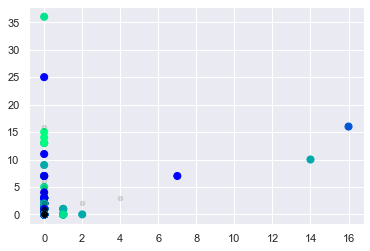

In [48]:
# let's see visualzie the test and train data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='winter')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], s=20, c='black', alpha=0.1)
plt.axis(lim);

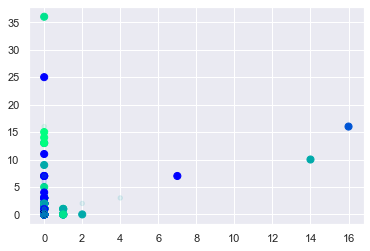

In [49]:
# Guassian  model : ALGORITHM

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train)
y_test = model.predict(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='winter')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='winter', alpha=0.1)
plt.axis(lim);

In [50]:
y_prob = model.predict_proba(X_test)

In [51]:
y_prob

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 4.84854224e-029, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [1.38284258e-221, 1.47274507e-137, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [52]:
X_test[-5:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
y_test[-5:]

array([9, 1, 3, 1, 7], dtype=uint8)

In [54]:
y_prob[-5:].round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [96]:
#Simillar to assignment_2

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_test_hat, normalize = True) * 100 )
print(accuracy_score(y_train,y_train_hat, normalize = True) * 100 )

58.56
58.778333333333336


In [100]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns; sns.set() 
cf_matrix = confusion_matrix(y_test,y_test_hat)
cl_report = classification_report(y_test,y_test_hat)
print(cf_matrix)
print()
print(cl_report)

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91    

#### Expalantion:

----------------------------------- END of MODEL_6 ------------------------------------------------------

## MODEL_7 

### MODEL_7.1 : K-Nearest Neighbors 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train);

In [41]:
# let's check the performance of model on test set
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test)
accuracy_score(y_test,y_test_hat, normalize = True) * 100 

85.39999999999999

In [46]:
print("Confusion Matrix")
cf_matrix = confusion_matrix(y_test,y_test_hat)
print(cf_matrix)
print(classification_report(y_test,y_test_hat))


Confusion Matrix
[[857   1  20  17   5   0  92   1   7   0]
 [  8 967   6  12   4   0   2   0   1   0]
 [ 20   2 814  11  78   0  75   0   0   0]
 [ 35   5  16 869  36   0  37   0   2   0]
 [  2   0 122  25 760   0  89   0   2   0]
 [  1   0   0   0   0 806   5 107   1  80]
 [173   0 129  23  74   0 588   0  13   0]
 [  0   0   0   0   0   2   0 957   0  41]
 [  1   1  13   5   7   0  12   7 952   2]
 [  0   0   0   0   0   1   1  28   0 970]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           

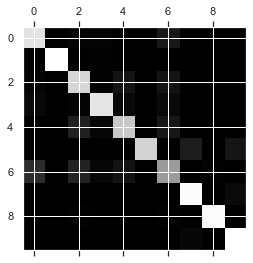

In [52]:
plt.matshow(cf_matrix, cmap = plt.cm.gray)
plt.show()

#### Expalantion:

### MODEL_7.2 : K-Nearest Neighbors with StratifiedKFold 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.8570166666666665


#### Expalantion:

----------------------------------- END of MODEL_7 ------------------------------------------------------

### MODEL_8 : SVM 

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=150, 
          whiten=True, random_state=0)
# Initialize SVC model
svc = SVC(kernel='rbf',  class_weight='balanced')
# Create pipleline model
model = make_pipeline(pca, svc)

In [ ]:
# Let's apply grid search with cross validation to find the best value for C and gamma
from sklearn.model_selection import GridSearchCV 
param_grid = {'svc__C': [.1, 1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
%time grid.fit(X_train, y_train)
print(grid.best_params_)

#### Expalantion:

### TASK2 :

In [23]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import PIL
  
print('Installed Pillow Version:', PIL.__version__)

Installed Pillow Version: 9.1.0


In [6]:
import cv2
import glob

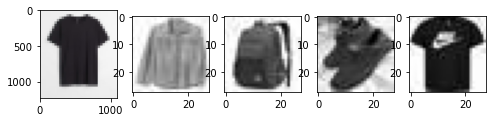

In [7]:
from PIL import Image
import matplotlib.pyplot as plt  
  
files = [cv2.imread(file) for file in glob.glob("*.jpeg")]

rows = 1
cols = 5
for i in range (0, len(files), rows*cols):
    fig = plt.figure(figsize=(8,8))
    for j in range(0, rows*cols):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(files[i+j])
    plt.show()

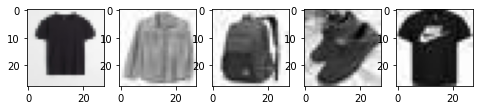

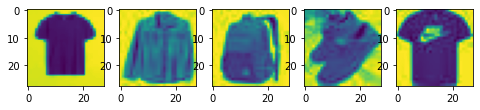

In [8]:
r_images = []
for file in files:
    r_images.append(cv2.resize(file, (28, 28)))

rows = 1
cols = 5
for i in range (0, len(r_images), rows*cols):
    fig = plt.figure(figsize=(8,8))
    for j in range(0, rows*cols):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(r_images[i+j])
    plt.show()


g_r_images = []
for r_image in r_images:
    g_r_images.append(cv2.cvtColor(r_image, cv2.COLOR_BGR2GRAY))

rows = 1
cols = 5
for i in range (0, len(g_r_images), rows*cols):
    fig = plt.figure(figsize=(8,8))
    for j in range(0, rows*cols):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(g_r_images[i+j])
    plt.show()

In [9]:
g_r_images

[array([[236, 236, 236, 236, 237, 237, 238, 238, 239, 239, 240, 241, 242,
         242, 243, 243, 243, 243, 244, 244, 244, 244, 245, 245, 246, 246,
         246, 246],
        [236, 236, 237, 236, 237, 237, 238, 238, 238, 229, 134, 193, 237,
         242, 242, 230, 157, 133, 241, 244, 244, 244, 245, 245, 246, 246,
         246, 245],
        [236, 237, 237, 237, 237, 238, 237, 204, 124,  53,  37,  35,  41,
          55,  52,  38,  28,  39,  69, 157, 232, 244, 245, 246, 246, 246,
         246, 246],
        [236, 237, 237, 237, 237, 238, 159,  43,  39,  38,  37,  34,  32,
          58,  35,  32,  31,  40,  40,  41,  59, 200, 245, 245, 247, 247,
         247, 247],
        [237, 237, 237, 237, 219,  70,  40,  31,  38,  37,  37,  38,  39,
          40,  41,  39,  40,  40,  41,  40,  37,  39, 136, 244, 246, 246,
         247, 247],
        [236, 237, 237, 237, 153,  41,  38,  28,  37,  37,  37,  38,  39,
          39,  39,  40,  40,  40,  41,  39,  37,  38,  44, 200, 246, 246,
         247

In [10]:
import numpy as np
np_img = np.array(g_r_images)


In [11]:
np_img.shape

(5, 28, 28)

In [12]:
X1_test = np_img.reshape(5, 784)

In [13]:
X1_test.shape

(5, 784)

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# initialize decision tree
tree = DecisionTreeClassifier()
# initialize bagging with 50 decision trees (each tree use 80% of training data)
bag = BaggingClassifier(tree, n_estimators=50, 
                        max_samples=0.5, random_state=0)

# fit the bagging model
bag.fit(X_train, y_train)


y_test_hat  = bag.predict(X1_test)


In [15]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_test_hat[2]])

Bag


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_test_hat = model.predict(X1_test)

In [17]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_test_hat[4]])

Shirt


### OVERALL SUMMARY:

### EXPLANATION OF TASK2 WORK: